<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/4.1%20%E6%9C%80%E4%BC%98%E5%8C%96%E6%A8%A1%E5%9E%8B%E6%A6%82%E8%BF%B0%20%E3%80%94pulp%E3%80%81cvxpy%E3%80%81scipy.optimize.linprog%20%E3%80%95%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

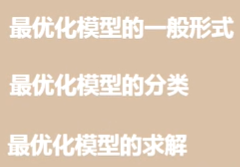

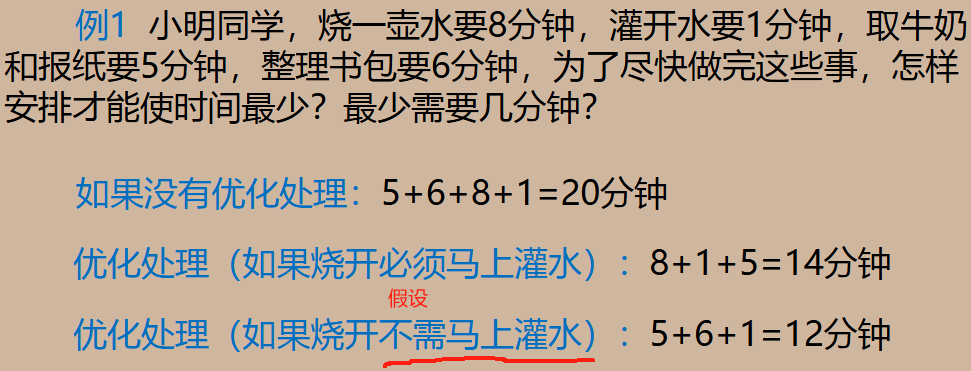

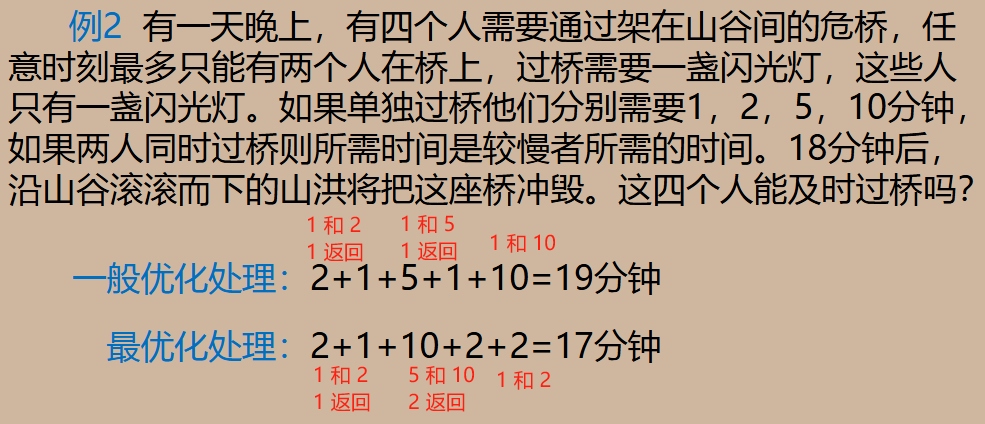

最优化方法  **运筹学** (雷达的布局等)

3 个要素：
* 决策变量 decision bariable
* 目标函数 objective function
* 约束条件 constraints




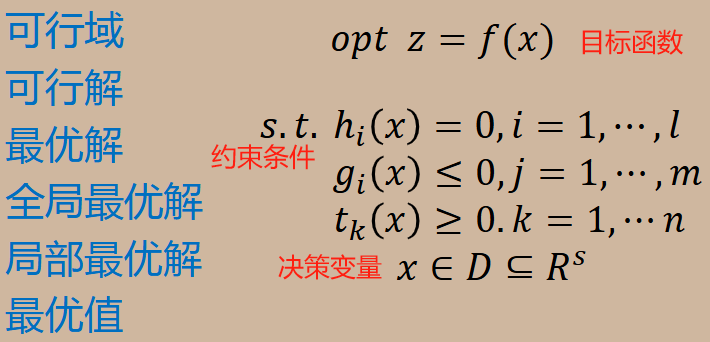

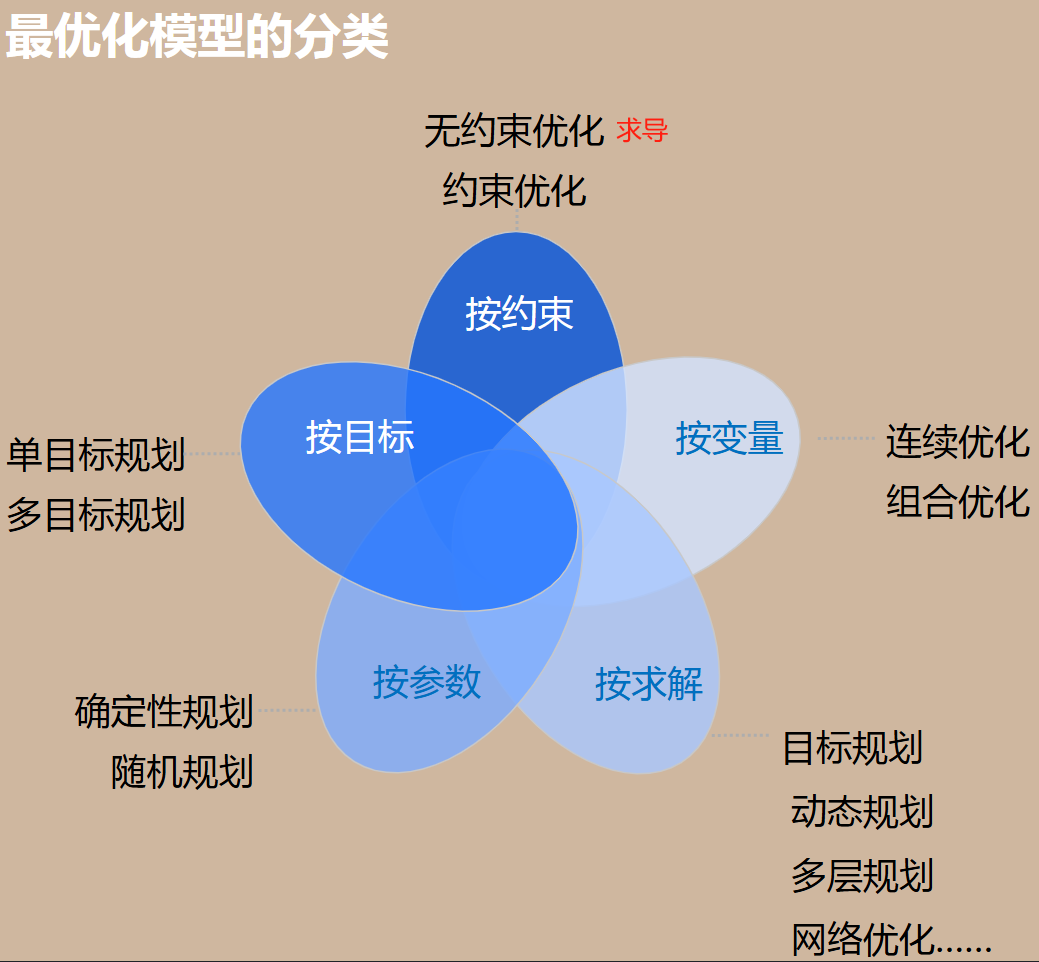

## 随堂测验：求解线性规划的最大值

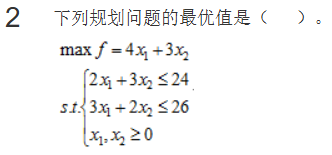

### 用 pulp 库求解

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 51.2 MB/s eta 0:00:00


In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

from pulp import *

prob = LpProblem("用 PuLP 求解线性规划问题", LpMaximize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

x1 = LpVariable("x1", 0, None) # 要求为整数 , LpInteger
x2 = LpVariable("x2", 0, None)


# 增加 目标函数
prob += 4 * x1 + 3 * x2

# 添加约束
prob += 2 * x1 + 3 * x2 <= 24
prob += 3 * x1 + 2 * x2 <= 26


prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

#
print("目标最大值 = ", value(prob.objective))

求解状态: Optimal
x1 = 6.0
x2 = 4.0
目标最大值 =  36.0


/usr/local/lib/python3.11/dist-packages/pulp/pulp.py:1423: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


### 用 scipy.optimize.linprog  求解

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [-4, -3] # 目标函数的参数系数 最小化
A = [[2, 3],
    [3, 2]]  #   # 约束中 等式或不等式 的参数系数
b = [24, 26]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*2)
print("目标的最大值：", -res.fun)  # 默认返回最小值
print("最优参数 x =", res.x)
print("是否优化成功：", res.message)

目标的最大值： 36.0
最优参数 x = [6. 4.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)


### 用 cvxpy 库求解

In [1]:
!pip install cvxpy

In [2]:
# 库函数官方示例：https://www.cvxpy.org/examples/index.html

# !pip install cvxpy

import cvxpy as cp
import numpy as np
#输入目标函数系数
c = np.array([4, 3])  # 目标的参数系数

x = cp.Variable(2, integer=True) # 构造决策变量
# 构造目标函数
obj = cp.Maximize( cp.sum( x @ c ) )  # 最大化 Maximize   最小化 Minimize

# 输入约束条件
A = np.array([[2, 3],
        [3, 2]])
b = np.array([24, 26])
constraints = [ A @ x <= b,
         x >= 0]  # 将非负约束加到约束里，极大加快求解速度
prob = cp.Problem(obj, constraints)  #  构造模型
prob.solve()  #  模型求解
print("是否优化成功：", prob.status)
print("最大值：", prob.value)
print("最优参数：", x.value)

# 36

是否优化成功： optimal
最大值： 36.0
最优参数： [6. 4.]
